In [ ]:
from meta_stuff import process_set
%matplotlib inline

# Single-predictor models for key features
Meta-analyses of 16 different features: 11 ClarifAI labels, 3 other visual features (face detection, brightness, and shot change), and 2 audio features (overall volume, and presence of speech). Each model contains only the target feature plus standard nuisance covariates.

defaultdict(<class 'list'>, {'speech': ['wK3Op', 'AobKG', 'Ar6VO', 'MzqbZ', 'Adp4e', 'M8LX1', 'AVr83', 'A1GkD', 'MNQ0q', 'w0gBX'], 'rms': ['MXmd3', 'AbnRy', 'MnPpP', 'wWV8y', '9EWBK', 'MGbQj', 'AqbR8', 'Maqy1', 'wjv20', '9Lq1z', 'wK2Np'], 'text': ['AxkEK', 'wJJo4', 'M34zo', 'AYX8e', '9BbP5', 'MDzYd', 'wQo1d', 'w0vpX', 'wK3vp', 'AopLG'], 'brightness': ['AobEG', 'A6m1k', 'wly2W', 'AxkE1', 'wJJoe', 'M34zR', 'AYX8P', '9BbPN', 'MDzYD', 'Arq4O'], 'shot_change': ['wQo3W', 'w0vPv', 'wK3V2', 'AobXB', 'Ar6N0', 'MzqP1', 'Adpkx', 'M8Lpl', 'AVr0K', 'MzQpZ'], 'any_faces': ['A1GoO', 'wOVxB', 'MXmod', 'AbnkR', 'MnPXX', 'wWVKQ', '9EWVr', 'MGbVD'], 'hand': ['Aqbq3', 'Maqmb', 'wjv7m', '9LqeK', '97v1Q', 'wkKRD', 'M4ndy', 'A2YrP', 'MNWl0', 'AdR1e'], 'action': ['M5Qpn', '9eKPb', 'AZy5W', 'Mvb7R', 'MmvkX', 'Mp8Xj', 'wyD7W', 'MR2Yb', 'wgjG0', 'M8vd1'], 'landscape': ['MPKJL', 'A6m5k', 'wly7W', 'Axk71', 'wJJ1e', 'M34dR', 'AYXrP', '9BbON', 'MDzgD', 'AVjJ3'], 'building': ['wQoxW', 'w0vov', 'wK3W2', 'Aob3B', 'Ar6D

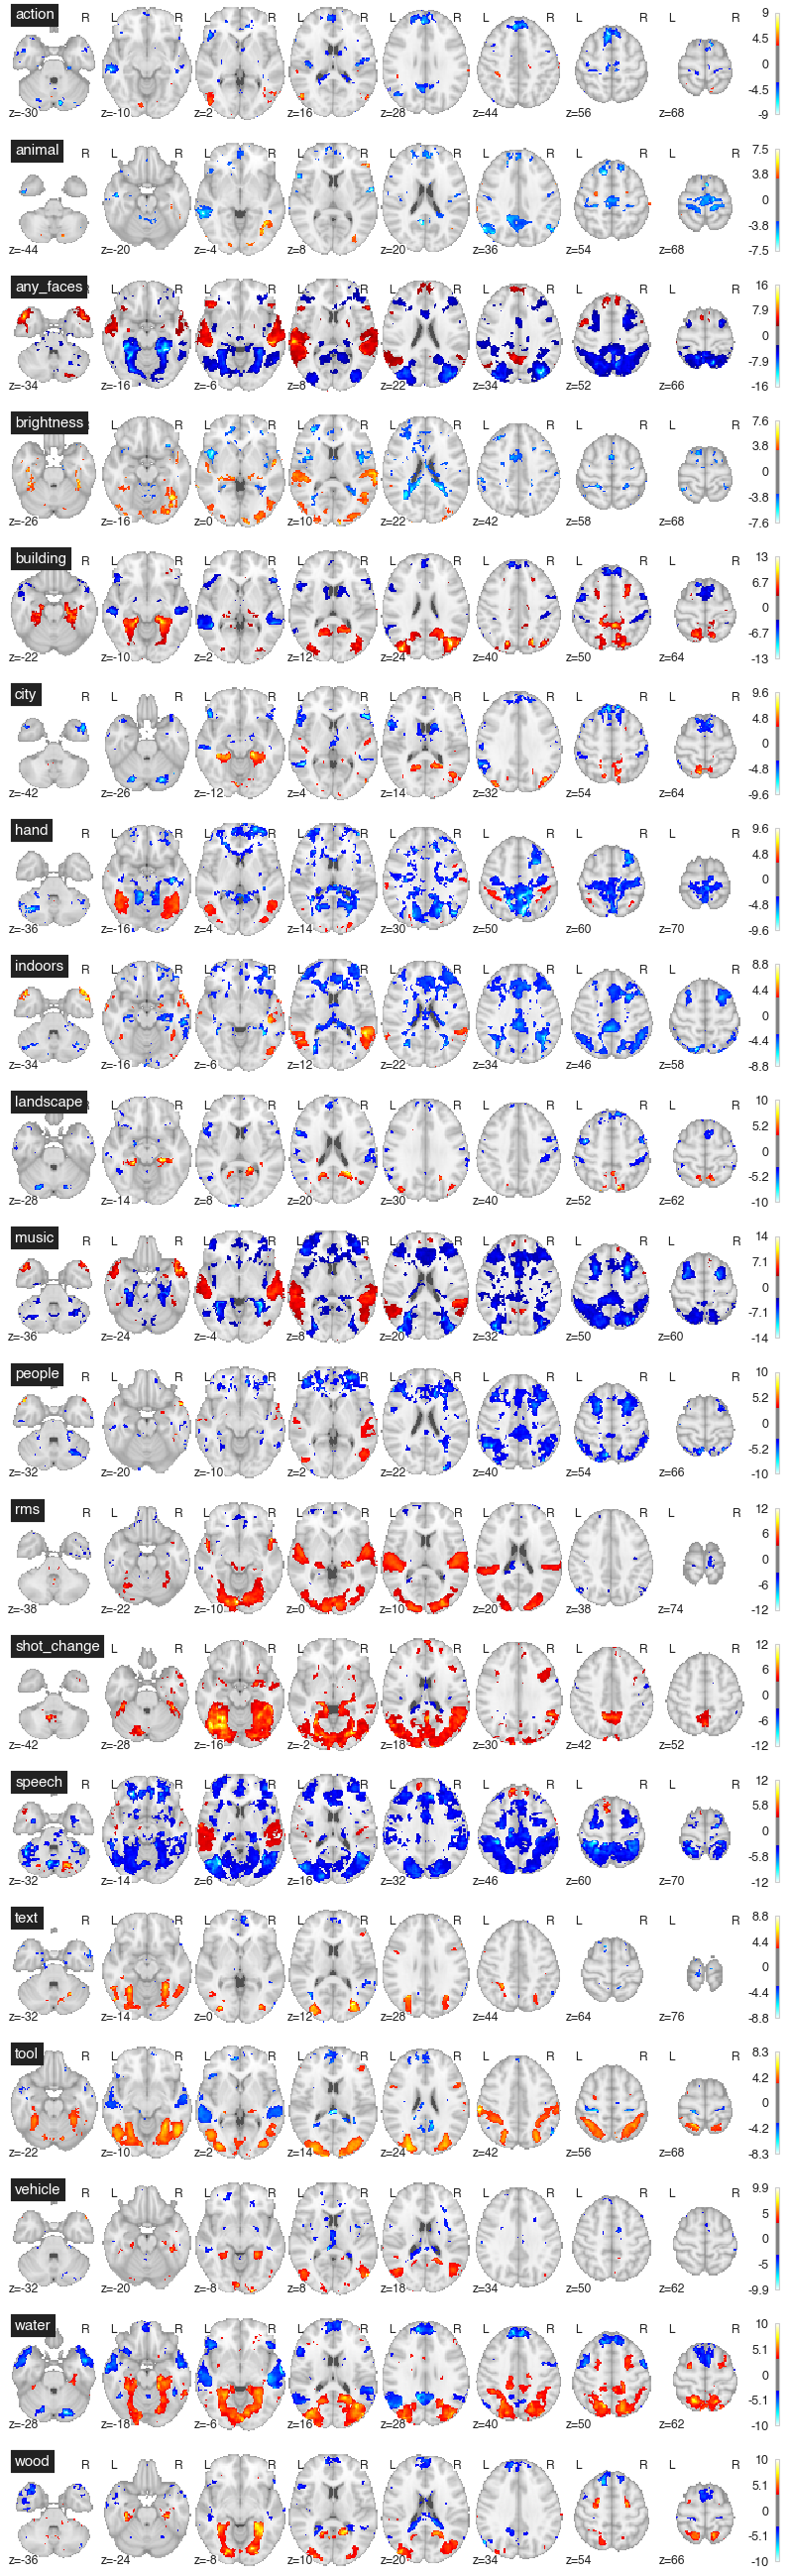

In [9]:
json_data = {"speech": {"Sherlock": {"sherlockPart1": "wK3Op"}, "HealthyBrainNetwork": {"movieDM": "AobKG"}, "SherlockMerlin": {"MerlinMovie": "Ar6VO", "SherlockMovie": "MzqbZ"}, "Life": {"life": "Adp4e"}, "Raiders": {"raiders": "M8LX1"}, "SchematicNarrative": {"perception": "AVr83"}, "studyforrest": {}, "ParanoiaStory": {"story": "A1GkD"}, "LearningTemporalStructure": {"movie": "MNQ0q"}, "Budapest": {"movie": "w0gBX"}}, "rms": {"Sherlock": {"sherlockPart1": "MXmd3"}, "HealthyBrainNetwork": {"movieDM": "AbnRy"}, "SherlockMerlin": {"MerlinMovie": "MnPpP", "SherlockMovie": "wWV8y"}, "Life": {"life": "9EWBK"}, "Raiders": {"raiders": "MGbQj"}, "SchematicNarrative": {"perception": "AqbR8"}, "studyforrest": {"movie": "Maqy1"}, "ParanoiaStory": {"story": "wjv20"}, "LearningTemporalStructure": {"movie": "9Lq1z"}, "Budapest": {"movie": "wK2Np"}}, "text": {"Sherlock": {"sherlockPart1": "AxkEK"}, "HealthyBrainNetwork": {"movieDM": "wJJo4"}, "SherlockMerlin": {"MerlinMovie": "M34zo", "SherlockMovie": "AYX8e"}, "Life": {"life": "9BbP5"}, "Raiders": {"raiders": "MDzYd"}, "SchematicNarrative": {"perception": "wQo1d"}, "studyforrest": {"movie": "w0vpX"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "wK3vp"}, "Budapest": {"movie": "AopLG"}}, "brightness": {"Sherlock": {"sherlockPart1": "AobEG"}, "HealthyBrainNetwork": {"movieDM": "A6m1k"}, "SherlockMerlin": {"MerlinMovie": "wly2W", "SherlockMovie": "AxkE1"}, "Life": {"life": "wJJoe"}, "Raiders": {"raiders": "M34zR"}, "SchematicNarrative": {"perception": "AYX8P"}, "studyforrest": {"movie": "9BbPN"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MDzYD"}, "Budapest": {"movie": "Arq4O"}}, "shot_change": {"Sherlock": {"sherlockPart1": "wQo3W"}, "HealthyBrainNetwork": {"movieDM": "w0vPv"}, "SherlockMerlin": {"MerlinMovie": "wK3V2", "SherlockMovie": "AobXB"}, "Life": {"life": "Ar6N0"}, "Raiders": {"raiders": "MzqP1"}, "SchematicNarrative": {"perception": "Adpkx"}, "studyforrest": {"movie": "M8Lpl"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "AVr0K"}, "Budapest": {"movie": "MzQpZ"}}, "any_faces": {"Sherlock": {"sherlockPart1": "A1GoO"}, "HealthyBrainNetwork": {"movieDM": "wOVxB"}, "SherlockMerlin": {"MerlinMovie": "MXmod", "SherlockMovie": "AbnkR"}, "Life": {}, "Raiders": {"raiders": "MnPXX"}, "SchematicNarrative": {"perception": "wWVKQ"}, "studyforrest": {"movie": "9EWVr"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MGbVD"}, "Budapest": {}}, "hand": {"Sherlock": {"sherlockPart1": "Aqbq3"}, "HealthyBrainNetwork": {"movieDM": "Maqmb"}, "SherlockMerlin": {"MerlinMovie": "wjv7m", "SherlockMovie": "9LqeK"}, "Life": {"life": "97v1Q"}, "Raiders": {"raiders": "wkKRD"}, "SchematicNarrative": {"perception": "M4ndy"}, "studyforrest": {"movie": "A2YrP"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MNWl0"}, "Budapest": {"movie": "AdR1e"}}, "action": {"Sherlock": {"sherlockPart1": "M5Qpn"}, "HealthyBrainNetwork": {"movieDM": "9eKPb"}, "SherlockMerlin": {"MerlinMovie": "AZy5W", "SherlockMovie": "Mvb7R"}, "Life": {"life": "MmvkX"}, "Raiders": {"raiders": "Mp8Xj"}, "SchematicNarrative": {"perception": "wyD7W"}, "studyforrest": {"movie": "MR2Yb"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "wgjG0"}, "Budapest": {"movie": "M8vd1"}}, "landscape": {"Sherlock": {"sherlockPart1": "MPKJL"}, "HealthyBrainNetwork": {"movieDM": "A6m5k"}, "SherlockMerlin": {"MerlinMovie": "wly7W", "SherlockMovie": "Axk71"}, "Life": {"life": "wJJ1e"}, "Raiders": {"raiders": "M34dR"}, "SchematicNarrative": {"perception": "AYXrP"}, "studyforrest": {"movie": "9BbON"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MDzgD"}, "Budapest": {"movie": "AVjJ3"}}, "building": {"Sherlock": {"sherlockPart1": "wQoxW"}, "HealthyBrainNetwork": {"movieDM": "w0vov"}, "SherlockMerlin": {"MerlinMovie": "wK3W2", "SherlockMovie": "Aob3B"}, "Life": {"life": "Ar6D0"}, "Raiders": {"raiders": "Mzql1"}, "SchematicNarrative": {"perception": "AdpDx"}, "studyforrest": {"movie": "M8LYl"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "AVrDK"}, "Budapest": {"movie": "A13DD"}}, "indoors": {"Sherlock": {"sherlockPart1": "A1GPO"}, "HealthyBrainNetwork": {"movieDM": "wOV6B"}, "SherlockMerlin": {"MerlinMovie": "MXm0d", "SherlockMovie": "AbnYR"}, "Life": {"life": "MnPJX"}, "Raiders": {"raiders": "wWVQQ"}, "SchematicNarrative": {"perception": "9EWXr"}, "studyforrest": {"movie": "MGbeD"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "AqbB3"}, "Budapest": {"movie": "wOOv3"}}, "city": {"Sherlock": {"sherlockPart1": "Maq3b"}, "HealthyBrainNetwork": {"movieDM": "wjvzm"}, "SherlockMerlin": {"MerlinMovie": "9LqXK", "SherlockMovie": "97v3Q"}, "Life": {"life": "wkK6D"}, "Raiders": {"raiders": "M4nly"}, "SchematicNarrative": {"perception": "A2YzP"}, "studyforrest": {"movie": "MNWX0"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "M5Qxn"}, "Budapest": {"movie": "MXjY3"}}, "animal": {"HealthyBrainNetwork": {"movieDM": "MpDX5"}, "SchematicNarrative": {"perception": "wy27p"}, "studyforrest": {"movie": "MRaYy"}, "Raiders": {"raiders": "wgyGL"}, "Life": {"life": "MPqJ4"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "A6oJv"}, "SherlockMerlin": {"MerlinMovie": "wl8Py", "SherlockMovie": "AxBzB"}, "LearningTemporalStructure": {"movie": "wJ3PG"}, "Budapest": {"movie": "AbqEy"}}, "music": {"HealthyBrainNetwork": {"movieDM": "M376v"}, "SchematicNarrative": {"perception": "AYyKz"}, "studyforrest": {"movie": "9Bqnv"}, "Raiders": {"raiders": "MD1vN"}, "Life": {"life": "wQDxq"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "w0go1"}, "SherlockMerlin": {"MerlinMovie": "wK2Wx", "SherlockMovie": "Aop3K"}, "LearningTemporalStructure": {"movie": "A6oJ1"}, "Budapest": {"movie": "MnkeP"}}, "vehicle": {"HealthyBrainNetwork": {"movieDM": "wl8P7"}, "SchematicNarrative": {"perception": "AxBzz"}, "studyforrest": {"movie": "wJ3Px"}, "Raiders": {"raiders": "M376J"}, "Life": {"life": "AYyKg"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "9BqnV"}, "SherlockMerlin": {"MerlinMovie": "MD1vE", "SherlockMovie": "wQDx8"}, "LearningTemporalStructure": {"movie": "w0gol"}, "Budapest": {"movie": "wWyry"}}, "water": {"HealthyBrainNetwork": {"movieDM": "wK2WX"}, "SchematicNarrative": {"perception": "Aop36"}, "studyforrest": {"movie": "ArqDR"}, "Raiders": {"raiders": "MzQlJ"}, "Life": {"life": "AdRDV"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "M8vY4"}, "SherlockMerlin": {"MerlinMovie": "AVjDO", "SherlockMovie": "A13PN"}, "LearningTemporalStructure": {"movie": "wOO65"}, "Budapest": {"movie": "9EdZK"}}, "wood": {"HealthyBrainNetwork": {"movieDM": "MXj0J"}, "SchematicNarrative": {"perception": "AbqY4"}, "studyforrest": {"movie": "MnkJ8"}, "Raiders": {"raiders": "wWyQZ"}, "Life": {"life": "9EdX1"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "MGveo"}, "SherlockMerlin": {"MerlinMovie": "AqQBj", "SherlockMovie": "Ma432"}, "LearningTemporalStructure": {"movie": "wjNzL"}, "Budapest": {"movie": "MGvmj"}}, "tool": {"HealthyBrainNetwork": {"movieDM": "9L2XR"}, "SchematicNarrative": {"perception": "97p3z"}, "studyforrest": {"movie": "wkV62"}, "Raiders": {"raiders": "M4jlO"}, "Life": {"life": "A2542"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "MNQBW"}, "SherlockMerlin": {"MerlinMovie": "M5545", "SherlockMovie": "9ey74"}, "LearningTemporalStructure": {"movie": "AZ47m"}, "Budapest": {}}, "people": {"HealthyBrainNetwork": {"movieDM": "AZ4qk"}, "SchematicNarrative": {"perception": "Mv382"}, "studyforrest": {"movie": "Mm3BB"}, "Raiders": {"raiders": "MpDP5"}, "Life": {"life": "wy2Op"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "MRa1y"}, "SherlockMerlin": {"MerlinMovie": "wgy6L", "SherlockMovie": "MPq84"}, "LearningTemporalStructure": {"movie": "A6o8v"}}}
imgs = process_set('visual', json_data=json_data, download=False, exclude=['SherlockMovie'])

# Single-predictor models — heterogeneity

defaultdict(<class 'list'>, {'speech': ['wK3Op', 'AobKG', 'Ar6VO', 'MzqbZ', 'Adp4e', 'M8LX1', 'AVr83', 'A1GkD', 'MNQ0q', 'w0gBX'], 'rms': ['MXmd3', 'AbnRy', 'MnPpP', 'wWV8y', '9EWBK', 'MGbQj', 'AqbR8', 'Maqy1', 'wjv20', '9Lq1z', 'wK2Np'], 'text': ['AxkEK', 'wJJo4', 'M34zo', 'AYX8e', '9BbP5', 'MDzYd', 'wQo1d', 'w0vpX', 'wK3vp', 'AopLG'], 'brightness': ['AobEG', 'A6m1k', 'wly2W', 'AxkE1', 'wJJoe', 'M34zR', 'AYX8P', '9BbPN', 'MDzYD', 'Arq4O'], 'shot_change': ['wQo3W', 'w0vPv', 'wK3V2', 'AobXB', 'Ar6N0', 'MzqP1', 'Adpkx', 'M8Lpl', 'AVr0K', 'MzQpZ'], 'any_faces': ['A1GoO', 'wOVxB', 'MXmod', 'AbnkR', 'MnPXX', 'wWVKQ', '9EWVr', 'MGbVD'], 'hand': ['Aqbq3', 'Maqmb', 'wjv7m', '9LqeK', '97v1Q', 'wkKRD', 'M4ndy', 'A2YrP', 'MNWl0', 'AdR1e'], 'action': ['M5Qpn', '9eKPb', 'AZy5W', 'Mvb7R', 'MmvkX', 'Mp8Xj', 'wyD7W', 'MR2Yb', 'wgjG0', 'M8vd1'], 'landscape': ['MPKJL', 'A6m5k', 'wly7W', 'Axk71', 'wJJ1e', 'M34dR', 'AYXrP', '9BbON', 'MDzgD', 'AVjJ3'], 'building': ['wQoxW', 'w0vov', 'wK3W2', 'Aob3B', 'Ar6D

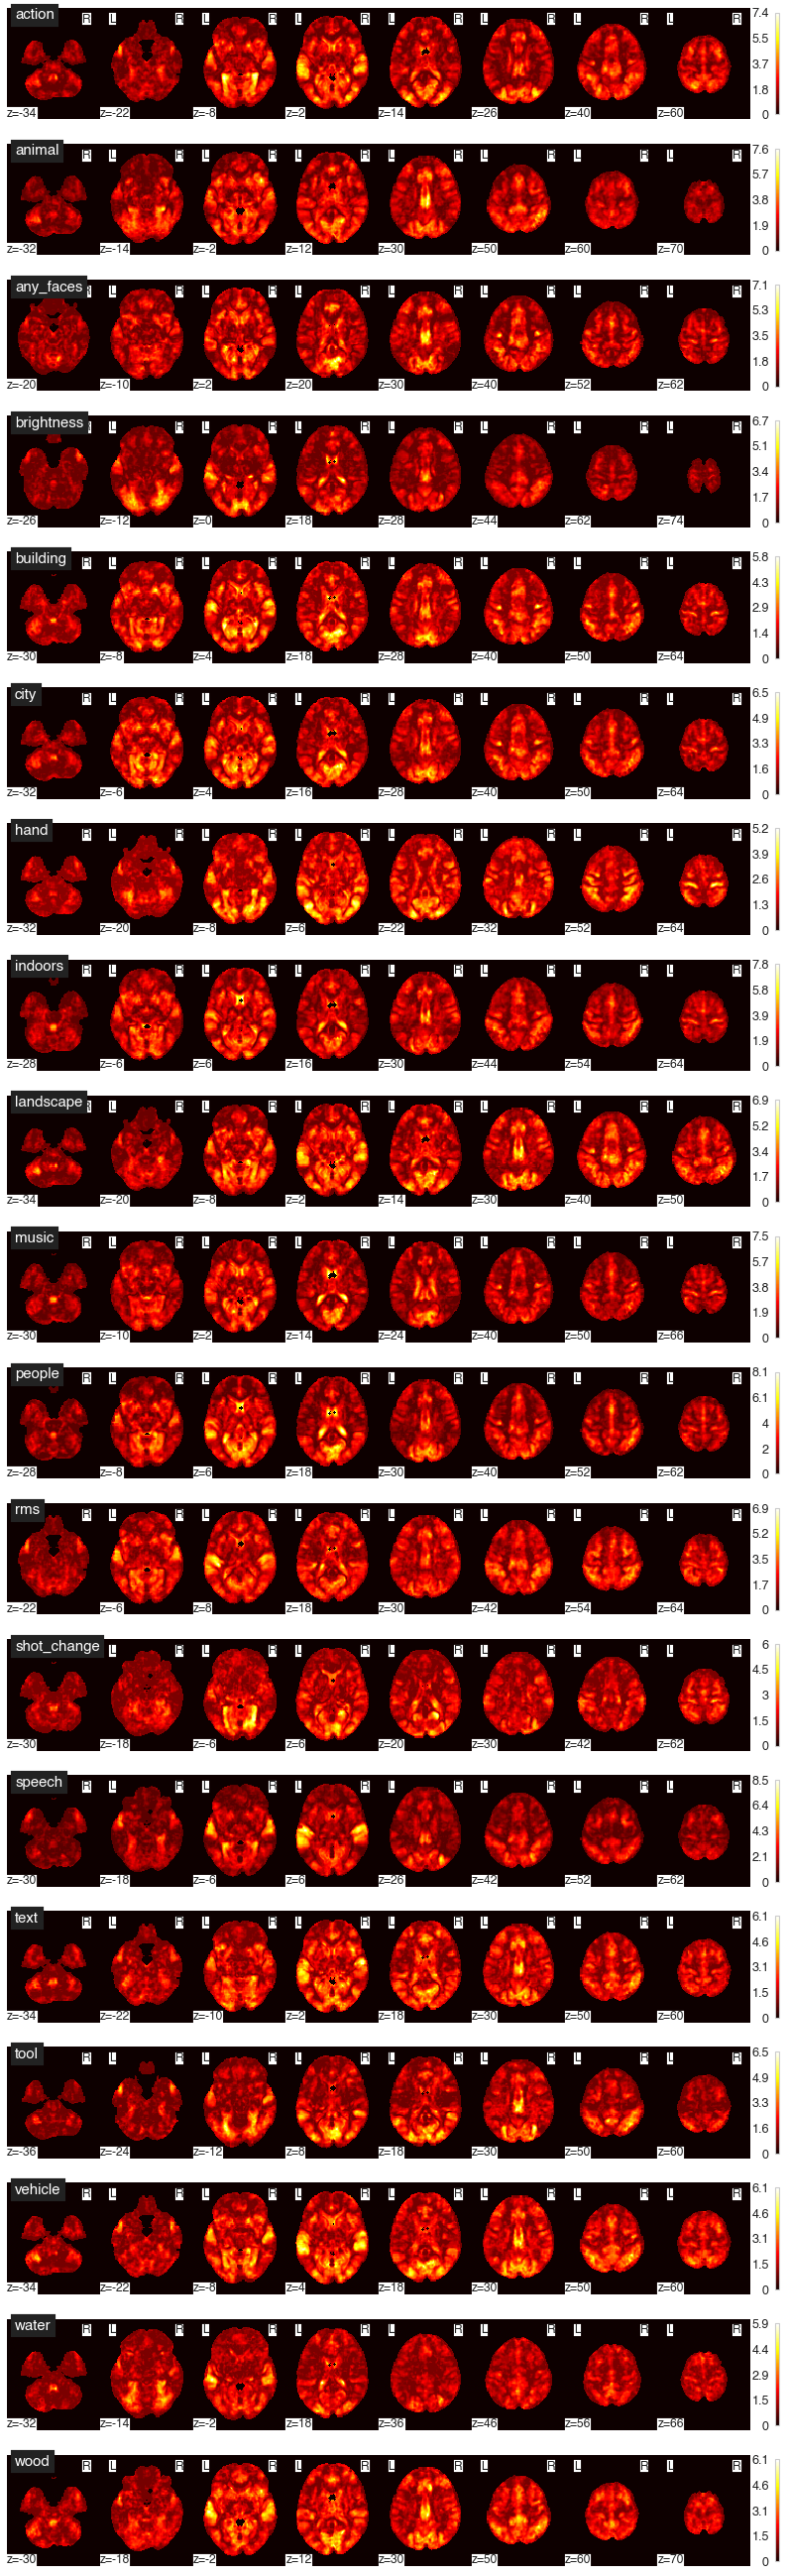

In [8]:
json_data = {"speech": {"Sherlock": {"sherlockPart1": "wK3Op"}, "HealthyBrainNetwork": {"movieDM": "AobKG"}, "SherlockMerlin": {"MerlinMovie": "Ar6VO", "SherlockMovie": "MzqbZ"}, "Life": {"life": "Adp4e"}, "Raiders": {"raiders": "M8LX1"}, "SchematicNarrative": {"perception": "AVr83"}, "studyforrest": {}, "ParanoiaStory": {"story": "A1GkD"}, "LearningTemporalStructure": {"movie": "MNQ0q"}, "Budapest": {"movie": "w0gBX"}}, "rms": {"Sherlock": {"sherlockPart1": "MXmd3"}, "HealthyBrainNetwork": {"movieDM": "AbnRy"}, "SherlockMerlin": {"MerlinMovie": "MnPpP", "SherlockMovie": "wWV8y"}, "Life": {"life": "9EWBK"}, "Raiders": {"raiders": "MGbQj"}, "SchematicNarrative": {"perception": "AqbR8"}, "studyforrest": {"movie": "Maqy1"}, "ParanoiaStory": {"story": "wjv20"}, "LearningTemporalStructure": {"movie": "9Lq1z"}, "Budapest": {"movie": "wK2Np"}}, "text": {"Sherlock": {"sherlockPart1": "AxkEK"}, "HealthyBrainNetwork": {"movieDM": "wJJo4"}, "SherlockMerlin": {"MerlinMovie": "M34zo", "SherlockMovie": "AYX8e"}, "Life": {"life": "9BbP5"}, "Raiders": {"raiders": "MDzYd"}, "SchematicNarrative": {"perception": "wQo1d"}, "studyforrest": {"movie": "w0vpX"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "wK3vp"}, "Budapest": {"movie": "AopLG"}}, "brightness": {"Sherlock": {"sherlockPart1": "AobEG"}, "HealthyBrainNetwork": {"movieDM": "A6m1k"}, "SherlockMerlin": {"MerlinMovie": "wly2W", "SherlockMovie": "AxkE1"}, "Life": {"life": "wJJoe"}, "Raiders": {"raiders": "M34zR"}, "SchematicNarrative": {"perception": "AYX8P"}, "studyforrest": {"movie": "9BbPN"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MDzYD"}, "Budapest": {"movie": "Arq4O"}}, "shot_change": {"Sherlock": {"sherlockPart1": "wQo3W"}, "HealthyBrainNetwork": {"movieDM": "w0vPv"}, "SherlockMerlin": {"MerlinMovie": "wK3V2", "SherlockMovie": "AobXB"}, "Life": {"life": "Ar6N0"}, "Raiders": {"raiders": "MzqP1"}, "SchematicNarrative": {"perception": "Adpkx"}, "studyforrest": {"movie": "M8Lpl"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "AVr0K"}, "Budapest": {"movie": "MzQpZ"}}, "any_faces": {"Sherlock": {"sherlockPart1": "A1GoO"}, "HealthyBrainNetwork": {"movieDM": "wOVxB"}, "SherlockMerlin": {"MerlinMovie": "MXmod", "SherlockMovie": "AbnkR"}, "Life": {}, "Raiders": {"raiders": "MnPXX"}, "SchematicNarrative": {"perception": "wWVKQ"}, "studyforrest": {"movie": "9EWVr"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MGbVD"}, "Budapest": {}}, "hand": {"Sherlock": {"sherlockPart1": "Aqbq3"}, "HealthyBrainNetwork": {"movieDM": "Maqmb"}, "SherlockMerlin": {"MerlinMovie": "wjv7m", "SherlockMovie": "9LqeK"}, "Life": {"life": "97v1Q"}, "Raiders": {"raiders": "wkKRD"}, "SchematicNarrative": {"perception": "M4ndy"}, "studyforrest": {"movie": "A2YrP"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MNWl0"}, "Budapest": {"movie": "AdR1e"}}, "action": {"Sherlock": {"sherlockPart1": "M5Qpn"}, "HealthyBrainNetwork": {"movieDM": "9eKPb"}, "SherlockMerlin": {"MerlinMovie": "AZy5W", "SherlockMovie": "Mvb7R"}, "Life": {"life": "MmvkX"}, "Raiders": {"raiders": "Mp8Xj"}, "SchematicNarrative": {"perception": "wyD7W"}, "studyforrest": {"movie": "MR2Yb"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "wgjG0"}, "Budapest": {"movie": "M8vd1"}}, "landscape": {"Sherlock": {"sherlockPart1": "MPKJL"}, "HealthyBrainNetwork": {"movieDM": "A6m5k"}, "SherlockMerlin": {"MerlinMovie": "wly7W", "SherlockMovie": "Axk71"}, "Life": {"life": "wJJ1e"}, "Raiders": {"raiders": "M34dR"}, "SchematicNarrative": {"perception": "AYXrP"}, "studyforrest": {"movie": "9BbON"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "MDzgD"}, "Budapest": {"movie": "AVjJ3"}}, "building": {"Sherlock": {"sherlockPart1": "wQoxW"}, "HealthyBrainNetwork": {"movieDM": "w0vov"}, "SherlockMerlin": {"MerlinMovie": "wK3W2", "SherlockMovie": "Aob3B"}, "Life": {"life": "Ar6D0"}, "Raiders": {"raiders": "Mzql1"}, "SchematicNarrative": {"perception": "AdpDx"}, "studyforrest": {"movie": "M8LYl"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "AVrDK"}, "Budapest": {"movie": "A13DD"}}, "indoors": {"Sherlock": {"sherlockPart1": "A1GPO"}, "HealthyBrainNetwork": {"movieDM": "wOV6B"}, "SherlockMerlin": {"MerlinMovie": "MXm0d", "SherlockMovie": "AbnYR"}, "Life": {"life": "MnPJX"}, "Raiders": {"raiders": "wWVQQ"}, "SchematicNarrative": {"perception": "9EWXr"}, "studyforrest": {"movie": "MGbeD"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "AqbB3"}, "Budapest": {"movie": "wOOv3"}}, "city": {"Sherlock": {"sherlockPart1": "Maq3b"}, "HealthyBrainNetwork": {"movieDM": "wjvzm"}, "SherlockMerlin": {"MerlinMovie": "9LqXK", "SherlockMovie": "97v3Q"}, "Life": {"life": "wkK6D"}, "Raiders": {"raiders": "M4nly"}, "SchematicNarrative": {"perception": "A2YzP"}, "studyforrest": {"movie": "MNWX0"}, "ParanoiaStory": {}, "LearningTemporalStructure": {"movie": "M5Qxn"}, "Budapest": {"movie": "MXjY3"}}, "animal": {"HealthyBrainNetwork": {"movieDM": "MpDX5"}, "SchematicNarrative": {"perception": "wy27p"}, "studyforrest": {"movie": "MRaYy"}, "Raiders": {"raiders": "wgyGL"}, "Life": {"life": "MPqJ4"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "A6oJv"}, "SherlockMerlin": {"MerlinMovie": "wl8Py", "SherlockMovie": "AxBzB"}, "LearningTemporalStructure": {"movie": "wJ3PG"}, "Budapest": {"movie": "AbqEy"}}, "music": {"HealthyBrainNetwork": {"movieDM": "M376v"}, "SchematicNarrative": {"perception": "AYyKz"}, "studyforrest": {"movie": "9Bqnv"}, "Raiders": {"raiders": "MD1vN"}, "Life": {"life": "wQDxq"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "w0go1"}, "SherlockMerlin": {"MerlinMovie": "wK2Wx", "SherlockMovie": "Aop3K"}, "LearningTemporalStructure": {"movie": "A6oJ1"}, "Budapest": {"movie": "MnkeP"}}, "vehicle": {"HealthyBrainNetwork": {"movieDM": "wl8P7"}, "SchematicNarrative": {"perception": "AxBzz"}, "studyforrest": {"movie": "wJ3Px"}, "Raiders": {"raiders": "M376J"}, "Life": {"life": "AYyKg"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "9BqnV"}, "SherlockMerlin": {"MerlinMovie": "MD1vE", "SherlockMovie": "wQDx8"}, "LearningTemporalStructure": {"movie": "w0gol"}, "Budapest": {"movie": "wWyry"}}, "water": {"HealthyBrainNetwork": {"movieDM": "wK2WX"}, "SchematicNarrative": {"perception": "Aop36"}, "studyforrest": {"movie": "ArqDR"}, "Raiders": {"raiders": "MzQlJ"}, "Life": {"life": "AdRDV"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "M8vY4"}, "SherlockMerlin": {"MerlinMovie": "AVjDO", "SherlockMovie": "A13PN"}, "LearningTemporalStructure": {"movie": "wOO65"}, "Budapest": {"movie": "9EdZK"}}, "wood": {"HealthyBrainNetwork": {"movieDM": "MXj0J"}, "SchematicNarrative": {"perception": "AbqY4"}, "studyforrest": {"movie": "MnkJ8"}, "Raiders": {"raiders": "wWyQZ"}, "Life": {"life": "9EdX1"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "MGveo"}, "SherlockMerlin": {"MerlinMovie": "AqQBj", "SherlockMovie": "Ma432"}, "LearningTemporalStructure": {"movie": "wjNzL"}, "Budapest": {"movie": "MGvmj"}}, "tool": {"HealthyBrainNetwork": {"movieDM": "9L2XR"}, "SchematicNarrative": {"perception": "97p3z"}, "studyforrest": {"movie": "wkV62"}, "Raiders": {"raiders": "M4jlO"}, "Life": {"life": "A2542"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "MNQBW"}, "SherlockMerlin": {"MerlinMovie": "M5545", "SherlockMovie": "9ey74"}, "LearningTemporalStructure": {"movie": "AZ47m"}, "Budapest": {}}, "people": {"HealthyBrainNetwork": {"movieDM": "AZ4qk"}, "SchematicNarrative": {"perception": "Mv382"}, "studyforrest": {"movie": "Mm3BB"}, "Raiders": {"raiders": "MpDP5"}, "Life": {"life": "wy2Op"}, "ParanoiaStory": {}, "Sherlock": {"sherlockPart1": "MRa1y"}, "SherlockMerlin": {"MerlinMovie": "wgy6L", "SherlockMovie": "MPq84"}, "LearningTemporalStructure": {"movie": "A6o8v"}}}
process_set('visual', json_data=json_data, download=False, stat='H', exclude=["SherlockMovie"], plot_kwargs={'threshold': None});